In [31]:
from model import get_model
from train_helper import BN_Trainer, Trainer, get_misclassified_images
# from trainer import Trainer
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from torchsummary import summary
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


In [33]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [34]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [35]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
# model = BatchNormCNN().to(device)
# summary(model, input_size=(1, 28, 28))

cuda


In [36]:
model_bn = get_model("BN").to(device)
summary(model_bn, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

In [37]:
bn_trainer = BN_Trainer(model_bn)

In [38]:
from torch.optim.lr_scheduler import StepLR, LambdaLR

optimizer = optim.SGD(model_bn.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    bn_trainer.train_bn(device, train_loader, optimizer, epoch)
    bn_trainer.test_bn(device, test_loader)

EPOCH: 0


Loss=0.1508595496416092 Batch_id=468 Accuracy=82.61: 100%|███████████████████████████| 469/469 [00:08<00:00, 57.04it/s]



Test set: Average loss: 0.1878, Accuracy: 9752/10000 (97.52%)

EPOCH: 1


Loss=0.03887411579489708 Batch_id=468 Accuracy=96.68: 100%|██████████████████████████| 469/469 [00:07<00:00, 59.71it/s]



Test set: Average loss: 0.1225, Accuracy: 9809/10000 (98.09%)

EPOCH: 2


Loss=0.06496250629425049 Batch_id=468 Accuracy=97.46: 100%|██████████████████████████| 469/469 [00:07<00:00, 61.31it/s]



Test set: Average loss: 0.0819, Accuracy: 9881/10000 (98.81%)

EPOCH: 3


Loss=0.07670800387859344 Batch_id=468 Accuracy=97.96: 100%|██████████████████████████| 469/469 [00:08<00:00, 58.24it/s]



Test set: Average loss: 0.0880, Accuracy: 9882/10000 (98.82%)

EPOCH: 4


Loss=0.1629219949245453 Batch_id=468 Accuracy=98.16: 100%|███████████████████████████| 469/469 [00:07<00:00, 59.81it/s]



Test set: Average loss: 0.0671, Accuracy: 9893/10000 (98.93%)

EPOCH: 5


Loss=0.13251256942749023 Batch_id=468 Accuracy=98.34: 100%|██████████████████████████| 469/469 [00:07<00:00, 60.23it/s]



Test set: Average loss: 0.0525, Accuracy: 9916/10000 (99.16%)

EPOCH: 6


Loss=0.02880786545574665 Batch_id=468 Accuracy=98.47: 100%|██████████████████████████| 469/469 [00:07<00:00, 60.94it/s]



Test set: Average loss: 0.0470, Accuracy: 9924/10000 (99.24%)

EPOCH: 7


Loss=0.044464290142059326 Batch_id=468 Accuracy=98.52: 100%|█████████████████████████| 469/469 [00:07<00:00, 59.51it/s]



Test set: Average loss: 0.0501, Accuracy: 9915/10000 (99.15%)

EPOCH: 8


Loss=0.03894403949379921 Batch_id=468 Accuracy=98.58: 100%|██████████████████████████| 469/469 [00:07<00:00, 65.44it/s]



Test set: Average loss: 0.0571, Accuracy: 9919/10000 (99.19%)

EPOCH: 9


Loss=0.06941293179988861 Batch_id=468 Accuracy=98.67: 100%|██████████████████████████| 469/469 [00:07<00:00, 59.47it/s]



Test set: Average loss: 0.0532, Accuracy: 9918/10000 (99.18%)

EPOCH: 10


Loss=0.02086283080279827 Batch_id=468 Accuracy=98.64: 100%|██████████████████████████| 469/469 [00:07<00:00, 61.20it/s]



Test set: Average loss: 0.0494, Accuracy: 9925/10000 (99.25%)

EPOCH: 11


Loss=0.05510719120502472 Batch_id=468 Accuracy=98.72: 100%|██████████████████████████| 469/469 [00:07<00:00, 59.95it/s]



Test set: Average loss: 0.0524, Accuracy: 9923/10000 (99.23%)

EPOCH: 12


Loss=0.06823434680700302 Batch_id=468 Accuracy=98.74: 100%|██████████████████████████| 469/469 [00:07<00:00, 59.98it/s]



Test set: Average loss: 0.0582, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.03229363635182381 Batch_id=468 Accuracy=98.78: 100%|██████████████████████████| 469/469 [00:08<00:00, 57.32it/s]



Test set: Average loss: 0.0413, Accuracy: 9932/10000 (99.32%)

EPOCH: 14


Loss=0.02680875174701214 Batch_id=468 Accuracy=98.81: 100%|██████████████████████████| 469/469 [00:08<00:00, 58.35it/s]



Test set: Average loss: 0.0389, Accuracy: 9926/10000 (99.26%)

EPOCH: 15


Loss=0.12597577273845673 Batch_id=468 Accuracy=98.80: 100%|██████████████████████████| 469/469 [00:08<00:00, 58.48it/s]



Test set: Average loss: 0.0379, Accuracy: 9919/10000 (99.19%)

EPOCH: 16


Loss=0.007508300710469484 Batch_id=468 Accuracy=98.86: 100%|█████████████████████████| 469/469 [00:08<00:00, 57.93it/s]



Test set: Average loss: 0.0486, Accuracy: 9935/10000 (99.35%)

EPOCH: 17


Loss=0.007201584987342358 Batch_id=468 Accuracy=98.88: 100%|█████████████████████████| 469/469 [00:07<00:00, 59.04it/s]



Test set: Average loss: 0.0742, Accuracy: 9925/10000 (99.25%)

EPOCH: 18


Loss=0.022308405488729477 Batch_id=468 Accuracy=98.91: 100%|█████████████████████████| 469/469 [00:08<00:00, 57.93it/s]



Test set: Average loss: 0.0333, Accuracy: 9931/10000 (99.31%)

EPOCH: 19


Loss=0.02944166772067547 Batch_id=468 Accuracy=98.89: 100%|██████████████████████████| 469/469 [00:07<00:00, 61.03it/s]



Test set: Average loss: 0.0422, Accuracy: 9933/10000 (99.33%)



In [41]:
bn_train_losses, bn_train_acc, bn_test_losses, bn_test_acc = bn_trainer.get_stats()

In [42]:
bn_misclassified_preds = get_misclassified_images(model_bn, device, test_loader)

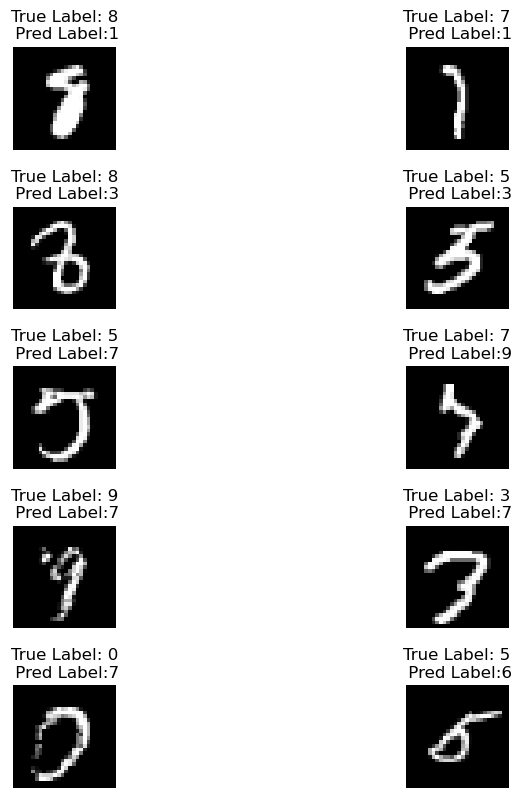

In [43]:
import numpy as np
fig, axs = plt.subplots(5, 2, figsize=(8,8),squeeze=False )
fig.tight_layout(h_pad=2)
idx = 0
keys_list = iter(list(bn_misclassified_preds.keys()))
for i in range(5):
    for j in range(2):
        idx = next(keys_list)
        axs[i, j].imshow(np.transpose(bn_misclassified_preds[idx][0], (1,2,0)), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'True Label: {bn_misclassified_preds[idx][1]}\n Pred Label:{bn_misclassified_preds[idx][2].item()}')
        

## Layer Normalization

In [44]:
model_ln = get_model("LN").to(device)
summary(model_ln, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         LayerNorm-3           [-1, 16, 26, 26]          21,632
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
         LayerNorm-7           [-1, 16, 24, 24]          18,432
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
        LayerNorm-13           [-1, 16, 10, 10]           3,200
          Dropout-14           [-1, 16,

In [45]:
ln_trainer = Trainer(model_ln)

In [46]:
from torch.optim.lr_scheduler import StepLR, LambdaLR

optimizer2 = optim.SGD(model_ln.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimizer2, milestones=[6,8,9], gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    ln_trainer.train(device, train_loader, optimizer2, epoch)
    ln_trainer.test(device, test_loader)

EPOCH: 0


Loss=0.39742013812065125 Batch_id=468 Accuracy=79.79: 100%|██████████████████████████| 469/469 [00:06<00:00, 67.45it/s]



Test set: Average loss: 0.1858, Accuracy: 9674/10000 (96.74%)

EPOCH: 1


Loss=0.1652103215456009 Batch_id=468 Accuracy=95.88: 100%|███████████████████████████| 469/469 [00:06<00:00, 74.88it/s]



Test set: Average loss: 0.0908, Accuracy: 9818/10000 (98.18%)

EPOCH: 2


Loss=0.19999654591083527 Batch_id=468 Accuracy=97.29: 100%|██████████████████████████| 469/469 [00:05<00:00, 85.40it/s]



Test set: Average loss: 0.0697, Accuracy: 9822/10000 (98.22%)

EPOCH: 3


Loss=0.07054463773965836 Batch_id=468 Accuracy=97.72: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.19it/s]



Test set: Average loss: 0.0507, Accuracy: 9883/10000 (98.83%)

EPOCH: 4


Loss=0.06500105559825897 Batch_id=468 Accuracy=98.18: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.49it/s]



Test set: Average loss: 0.0416, Accuracy: 9894/10000 (98.94%)

EPOCH: 5


Loss=0.04934624955058098 Batch_id=468 Accuracy=98.21: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.33it/s]



Test set: Average loss: 0.0440, Accuracy: 9889/10000 (98.89%)

EPOCH: 6


Loss=0.06238078698515892 Batch_id=468 Accuracy=98.41: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.68it/s]



Test set: Average loss: 0.0340, Accuracy: 9921/10000 (99.21%)

EPOCH: 7


Loss=0.020879613235592842 Batch_id=468 Accuracy=98.48: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.62it/s]



Test set: Average loss: 0.0277, Accuracy: 9930/10000 (99.30%)

EPOCH: 8


Loss=0.04264666140079498 Batch_id=468 Accuracy=98.54: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.20it/s]



Test set: Average loss: 0.0338, Accuracy: 9906/10000 (99.06%)

EPOCH: 9


Loss=0.06024802103638649 Batch_id=468 Accuracy=98.64: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.17it/s]



Test set: Average loss: 0.0318, Accuracy: 9913/10000 (99.13%)

EPOCH: 10


Loss=0.016546770930290222 Batch_id=468 Accuracy=98.62: 100%|█████████████████████████| 469/469 [00:06<00:00, 74.07it/s]



Test set: Average loss: 0.0318, Accuracy: 9918/10000 (99.18%)

EPOCH: 11


Loss=0.024708813056349754 Batch_id=468 Accuracy=98.72: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.74it/s]



Test set: Average loss: 0.0303, Accuracy: 9917/10000 (99.17%)

EPOCH: 12


Loss=0.02133738249540329 Batch_id=468 Accuracy=98.78: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.49it/s]



Test set: Average loss: 0.0276, Accuracy: 9917/10000 (99.17%)

EPOCH: 13


Loss=0.060234472155570984 Batch_id=468 Accuracy=98.78: 100%|█████████████████████████| 469/469 [00:06<00:00, 74.20it/s]



Test set: Average loss: 0.0278, Accuracy: 9926/10000 (99.26%)

EPOCH: 14


Loss=0.016797903925180435 Batch_id=468 Accuracy=98.80: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.98it/s]



Test set: Average loss: 0.0299, Accuracy: 9921/10000 (99.21%)

EPOCH: 15


Loss=0.052544984966516495 Batch_id=468 Accuracy=98.82: 100%|█████████████████████████| 469/469 [00:06<00:00, 74.27it/s]



Test set: Average loss: 0.0238, Accuracy: 9932/10000 (99.32%)

EPOCH: 16


Loss=0.03988738730549812 Batch_id=468 Accuracy=98.89: 100%|██████████████████████████| 469/469 [00:06<00:00, 76.72it/s]



Test set: Average loss: 0.0248, Accuracy: 9921/10000 (99.21%)

EPOCH: 17


Loss=0.033276885747909546 Batch_id=468 Accuracy=98.90: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.44it/s]



Test set: Average loss: 0.0258, Accuracy: 9927/10000 (99.27%)

EPOCH: 18


Loss=0.016639696434140205 Batch_id=468 Accuracy=98.89: 100%|█████████████████████████| 469/469 [00:06<00:00, 74.76it/s]



Test set: Average loss: 0.0261, Accuracy: 9928/10000 (99.28%)

EPOCH: 19


Loss=0.019628873094916344 Batch_id=468 Accuracy=98.90: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.16it/s]



Test set: Average loss: 0.0251, Accuracy: 9921/10000 (99.21%)



In [47]:
ln_train_losses, ln_train_acc, ln_test_losses, ln_test_acc = ln_trainer.get_stats()

In [48]:
ln_misclassified_preds = get_misclassified_images(model_ln, device, test_loader)

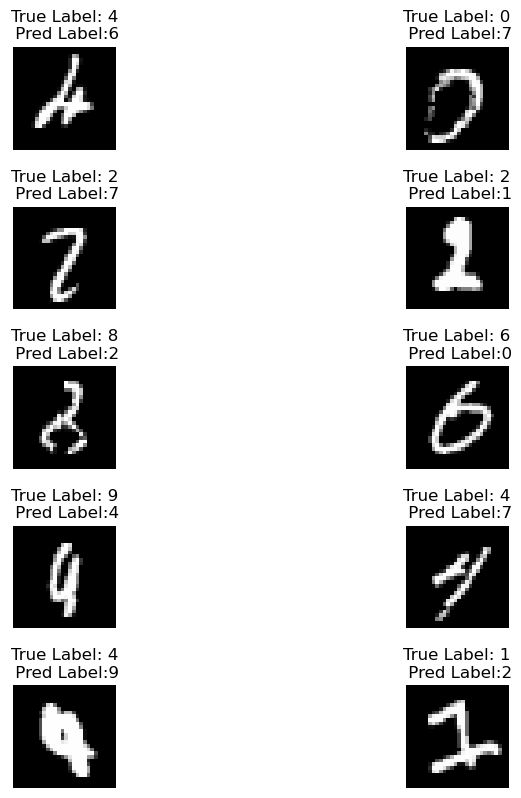

In [49]:
import numpy as np
fig, axs = plt.subplots(5, 2, figsize=(8,8),squeeze=False )
fig.tight_layout(h_pad=2)
keys_list = iter(list(ln_misclassified_preds.keys()))
for i in range(5):
    for j in range(2):
        idx = next(keys_list)
        axs[i, j].imshow(np.transpose(ln_misclassified_preds[idx][0], (1,2,0)), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'True Label: {ln_misclassified_preds[idx][1]}\n Pred Label:{ln_misclassified_preds[idx][2].item()}')
        

## Group Normalization

In [50]:
model_gn = get_model("GN").to(device)
summary(model_gn, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         GroupNorm-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

In [51]:
gn_trainer = Trainer(model_gn)

In [52]:
from torch.optim.lr_scheduler import StepLR, LambdaLR

optimizer = optim.SGD(model_gn.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    gn_trainer.train(device, train_loader, optimizer, epoch)
    gn_trainer.test(device, test_loader)

EPOCH: 0


Loss=0.13023199141025543 Batch_id=468 Accuracy=81.73: 100%|██████████████████████████| 469/469 [00:07<00:00, 66.97it/s]



Test set: Average loss: 0.1205, Accuracy: 9683/10000 (96.83%)

EPOCH: 1


Loss=0.1846759170293808 Batch_id=468 Accuracy=96.66: 100%|███████████████████████████| 469/469 [00:06<00:00, 71.06it/s]



Test set: Average loss: 0.0719, Accuracy: 9802/10000 (98.02%)

EPOCH: 2


Loss=0.09855035692453384 Batch_id=468 Accuracy=97.47: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.19it/s]



Test set: Average loss: 0.0537, Accuracy: 9847/10000 (98.47%)

EPOCH: 3


Loss=0.1539384424686432 Batch_id=468 Accuracy=97.78: 100%|███████████████████████████| 469/469 [00:06<00:00, 70.90it/s]



Test set: Average loss: 0.0446, Accuracy: 9861/10000 (98.61%)

EPOCH: 4


Loss=0.04379774257540703 Batch_id=468 Accuracy=98.05: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.12it/s]



Test set: Average loss: 0.0430, Accuracy: 9878/10000 (98.78%)

EPOCH: 5


Loss=0.02197912335395813 Batch_id=468 Accuracy=98.24: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.17it/s]



Test set: Average loss: 0.0323, Accuracy: 9907/10000 (99.07%)

EPOCH: 6


Loss=0.043446172028779984 Batch_id=468 Accuracy=98.29: 100%|█████████████████████████| 469/469 [00:06<00:00, 71.24it/s]



Test set: Average loss: 0.0371, Accuracy: 9890/10000 (98.90%)

EPOCH: 7


Loss=0.038924019783735275 Batch_id=468 Accuracy=98.42: 100%|█████████████████████████| 469/469 [00:06<00:00, 70.94it/s]



Test set: Average loss: 0.0307, Accuracy: 9906/10000 (99.06%)

EPOCH: 8


Loss=0.028467802330851555 Batch_id=468 Accuracy=98.48: 100%|█████████████████████████| 469/469 [00:06<00:00, 71.72it/s]



Test set: Average loss: 0.0269, Accuracy: 9920/10000 (99.20%)

EPOCH: 9


Loss=0.00877279881387949 Batch_id=468 Accuracy=98.55: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.40it/s]



Test set: Average loss: 0.0271, Accuracy: 9926/10000 (99.26%)

EPOCH: 10


Loss=0.027577606961131096 Batch_id=468 Accuracy=98.66: 100%|█████████████████████████| 469/469 [00:06<00:00, 72.34it/s]



Test set: Average loss: 0.0256, Accuracy: 9924/10000 (99.24%)

EPOCH: 11


Loss=0.04809762164950371 Batch_id=468 Accuracy=98.70: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.20it/s]



Test set: Average loss: 0.0218, Accuracy: 9942/10000 (99.42%)

EPOCH: 12


Loss=0.009571817703545094 Batch_id=468 Accuracy=98.70: 100%|█████████████████████████| 469/469 [00:06<00:00, 71.86it/s]



Test set: Average loss: 0.0269, Accuracy: 9924/10000 (99.24%)

EPOCH: 13


Loss=0.03021933324635029 Batch_id=468 Accuracy=98.76: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.44it/s]



Test set: Average loss: 0.0280, Accuracy: 9914/10000 (99.14%)

EPOCH: 14


Loss=0.001975128659978509 Batch_id=468 Accuracy=98.76: 100%|█████████████████████████| 469/469 [00:05<00:00, 80.56it/s]



Test set: Average loss: 0.0245, Accuracy: 9926/10000 (99.26%)

EPOCH: 15


Loss=0.054415225982666016 Batch_id=468 Accuracy=98.92: 100%|█████████████████████████| 469/469 [00:06<00:00, 70.97it/s]



Test set: Average loss: 0.0259, Accuracy: 9925/10000 (99.25%)

EPOCH: 16


Loss=0.0053106374107301235 Batch_id=468 Accuracy=98.80: 100%|████████████████████████| 469/469 [00:06<00:00, 72.94it/s]



Test set: Average loss: 0.0288, Accuracy: 9922/10000 (99.22%)

EPOCH: 17


Loss=0.03567618876695633 Batch_id=468 Accuracy=98.82: 100%|██████████████████████████| 469/469 [00:06<00:00, 71.11it/s]



Test set: Average loss: 0.0279, Accuracy: 9910/10000 (99.10%)

EPOCH: 18


Loss=0.08047407120466232 Batch_id=468 Accuracy=98.86: 100%|██████████████████████████| 469/469 [00:06<00:00, 70.25it/s]



Test set: Average loss: 0.0178, Accuracy: 9947/10000 (99.47%)

EPOCH: 19


Loss=0.026311757043004036 Batch_id=468 Accuracy=98.91: 100%|█████████████████████████| 469/469 [00:06<00:00, 72.88it/s]



Test set: Average loss: 0.0305, Accuracy: 9903/10000 (99.03%)



In [53]:
gn_train_losses, gn_train_acc, gn_test_losses, gn_test_acc = gn_trainer.get_stats()

In [54]:
gn_misclassified_preds = get_misclassified_images(model_gn, device, test_loader)

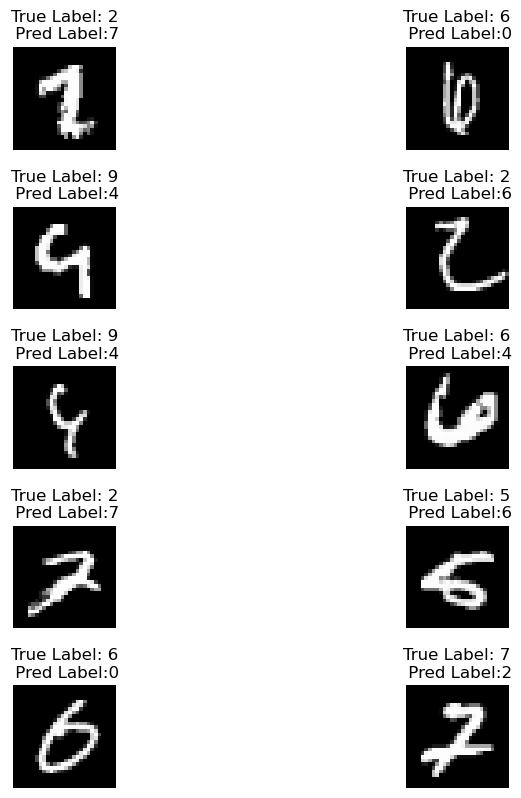

In [55]:
import numpy as np
fig, axs = plt.subplots(5, 2, figsize=(8,8),squeeze=False )
fig.tight_layout(h_pad=2)
keys_list = iter(list(gn_misclassified_preds.keys()))
for i in range(5):
    for j in range(2):
        idx = next(keys_list)
        axs[i, j].imshow(np.transpose(gn_misclassified_preds[idx][0], (1,2,0)), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'True Label: {gn_misclassified_preds[idx][1]}\n Pred Label:{gn_misclassified_preds[idx][2].item()}')
        

### Loss Plot

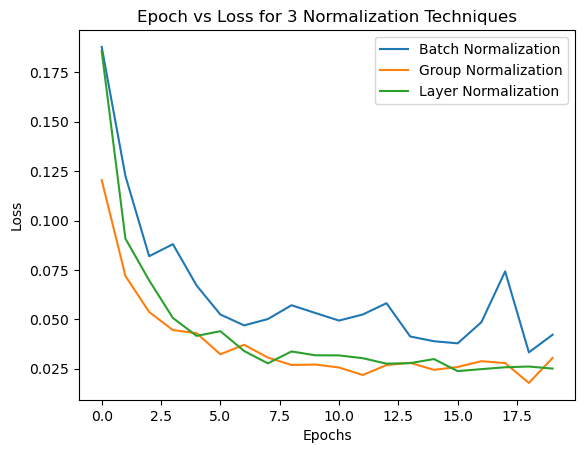

In [56]:
plt.plot(bn_test_losses, label="Batch Normalization")
plt.plot(gn_test_losses, label="Group Normalization")
plt.plot(ln_test_losses, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epoch vs Loss for 3 Normalization Techniques")
plt.legend()

### Accuracy Plot

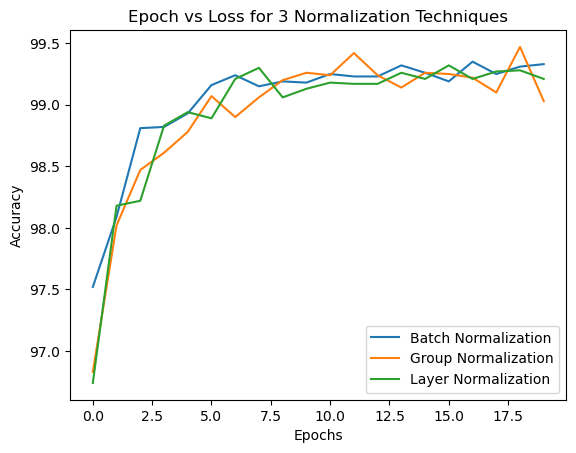

In [57]:
plt.plot(bn_test_acc, label="Batch Normalization")
plt.plot(gn_test_acc, label="Group Normalization")
plt.plot(ln_test_acc, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epoch vs Loss for 3 Normalization Techniques")
plt.legend()